<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/02_Categorical_Data_Visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Categorical Data Feature Engineering</h1>

## Overview

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>In this section we will </p>
    <ol>
        <li>Import Categorical Data.</li>
        <li>Perform Feature Engineering (on required categories).</li>
        <li>Encode Categorical Input Features (for Feature Ranking).</li>
        <li>Encode Target Output.</li>
    </ol>
</div>

### Standard Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Disable pretty
%pprint

%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set() 

Pretty printing has been turned OFF


In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Import Categorical Data

In [4]:
CATEGORICAL_FEATURES = ['gender', 'nationality','place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 
                        'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 
                        'student_absence_days','class']

In [5]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
categorical_df = pd.read_csv('./data/xAPI-Edu-Data_cleaned.csv', usecols = CATEGORICAL_FEATURES)

In [6]:
# Import the Student's data from github storage
# Run only in colab
#url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_cleaned.csv'
#categorical_df = pd.read_csv(url, usecols = CATEGORICAL_FEATURES )

In [7]:
# Cheack the data is properly loaded
categorical_df.head()

,gender,nationality,place_of_birth,stage_id,grade_id,section_id,topic,semester,relation,parent_answering_survey,parent_school_satisfaction,student_absence_days,class
0,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [8]:
# Convert Data Type to Categories for efficent memory utilization
for feature in categorical_df.columns:
    categorical_df[feature] = categorical_df[feature].astype('category')
categorical_df.dtypes

gender                        category
nationality                   category
place_of_birth                category
stage_id                      category
grade_id                      category
section_id                    category
topic                         category
semester                      category
relation                      category
parent_answering_survey       category
parent_school_satisfaction    category
student_absence_days          category
class                         category
dtype: object

In [9]:
NOMINAL_FEATURES = ['nationality','place_of_birth', 'section_id', 'topic']
ORDINAL_FEATURES = ['stage_id', 'grade_id']

In [11]:
nominal_df = categorical_df[NOMINAL_FEATURES]
ordinal_df = categorical_df[ORDINAL_FEATURES]

### 2. Perform Feature Engineering

<div style="background-color:Gainsboro; padding:20px; text-align:justify">
As a result of visual anaylsis of categorical data it was obvious that <strong>'nationality'</strong>,  and <strong>'place_of_birth'</strong> require feature engineering to reduce the high cardinalty and rare lables.
</div>

### 2.1 Nominal 

#### nationality and place_of_birth

In [12]:
nationality_df = pd.DataFrame(nominal_df['nationality'].value_counts()).reset_index()
place_of_birth_df = pd.DataFrame(nominal_df['place_of_birth'].value_counts()).reset_index()

In [13]:
# Comparing the nationality and place of birth together
geographical_df = nationality_df.merge(place_of_birth_df, how='left', on='index')
geographical_df.columns = ['index','nationality', 'place_of_birth']
geographical_df['nationality %'] = (geographical_df['nationality']/geographical_df['nationality'].sum())*100
geographical_df['place_of_birth %'] = (geographical_df['place_of_birth']/geographical_df['place_of_birth'].sum())*100
geographical_df

,index,nationality,place_of_birth,nationality %,place_of_birth %
0,Kuwait,179,180,37.447699,37.656904
1,Jordan,170,174,35.564854,36.401674
2,Palestine,28,10,5.857741,2.092050
3,Iraq,22,22,4.602510,4.602510
4,Lebanon,17,19,3.556485,3.974895
5,Tunis,12,9,2.510460,1.882845
6,SaudiArabia,11,16,2.301255,3.347280
7,Egypt,9,9,1.882845,1.882845
8,Syria,7,6,1.464435,1.255230
9,Iran,6,6,1.255230,1.255230


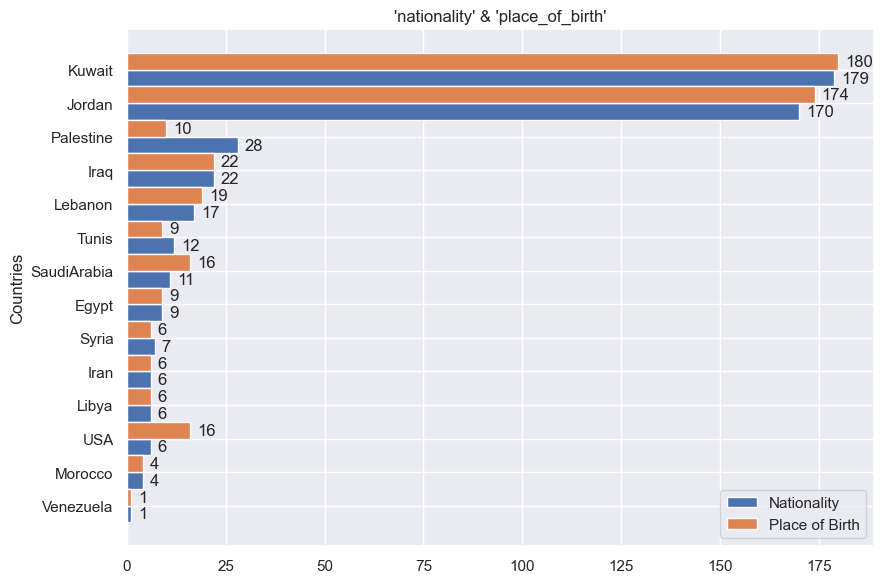

In [14]:
labels = list(geographical_df['index'])[::-1]
counts_nationality= list(geographical_df['nationality'])[::-1]
counts_place_of_birth=list(geographical_df['place_of_birth'])[::-1]

y = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(9, 6))
rects1 = ax.barh(y - width/2, counts_nationality, width, label='Nationality')
rects2 = ax.barh(y + width/2, counts_place_of_birth, width, label='Place of Birth')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Countries')
ax.set_title("'nationality' & 'place_of_birth'")
ax.set_yticks(y, labels)
ax.legend(loc=4)

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=5)

fig.tight_layout()

plt.show()

In [ ]:
## TODO Feature Engineering

In [15]:
geographical_df

,index,nationality,place_of_birth,nationality %,place_of_birth %
0,Kuwait,179,180,37.447699,37.656904
1,Jordan,170,174,35.564854,36.401674
2,Palestine,28,10,5.857741,2.092050
3,Iraq,22,22,4.602510,4.602510
4,Lebanon,17,19,3.556485,3.974895
5,Tunis,12,9,2.510460,1.882845
6,SaudiArabia,11,16,2.301255,3.347280
7,Egypt,9,9,1.882845,1.882845
8,Syria,7,6,1.464435,1.255230
9,Iran,6,6,1.255230,1.255230


In [16]:
country_map = {
    'Kuwait':'Kuwait',
    'Lebanon':'Others',
    'Egypt' : 'Others',
    'SaudiArabia':'Others',
    'USA':'Others',
    'Jordan':'Jordan',
    'Venezuela':'Others',
    'Iran':'Others',
    'Tunis':'Others',
    'Morocco':'Others',
    'Syria':'Others',
    'Palestine':'Others',
    'Iraq':'Others',
    'Libya':'Others'
}
geographical_df['labels']= geographical_df['index'].map(country_map)
geographical_df[['index', 'labels']]

,index,labels
0,Kuwait,Kuwait
1,Jordan,Jordan
2,Palestine,Others
3,Iraq,Others
4,Lebanon,Others
5,Tunis,Others
6,SaudiArabia,Others
7,Egypt,Others
8,Syria,Others
9,Iran,Others


In [17]:
nominal_df['modified_nationality']= nominal_df['nationality'].map(country_map)
nominal_df['modified_place_of_birth']= nominal_df['place_of_birth'].map(country_map)

In [18]:
nominal_df['modified_nationality'].value_counts()

Kuwait    179
Jordan    170
Others    129
Name: modified_nationality, dtype: int64

In [19]:
nominal_df['modified_place_of_birth'].value_counts()

Kuwait    180
Jordan    174
Others    124
Name: modified_place_of_birth, dtype: int64

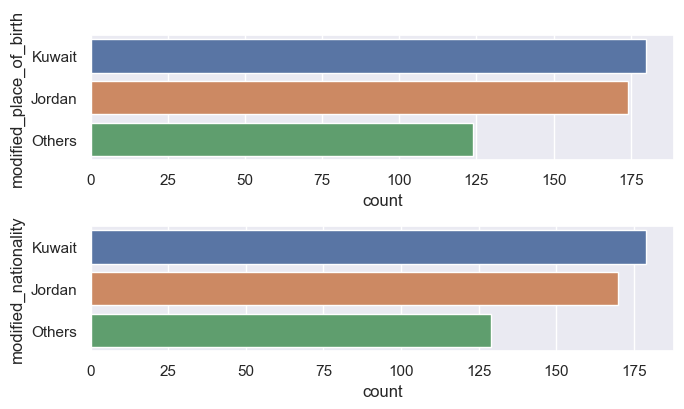

In [20]:
plt.rcParams["figure.figsize"] = [7.00, 4.00]

fig, axs = plt.subplots(2)

sns.countplot(ax=axs[0], y='modified_place_of_birth', data=nominal_df, order=['Kuwait','Jordan','Others'])
sns.countplot(ax=axs[1], y='modified_nationality', data=nominal_df,order=['Kuwait','Jordan','Others']);

#sns.countplot(y='eng_place_of_birth', data=nominal_df);

In [ ]:
# TODO Conversion

### 2.2 Ordinal 

#### grade_id

In [21]:
grade_id_df = pd.DataFrame(categorical_df['grade_id'].value_counts()).reset_index()
grade_id_df['%'] = (grade_id_df['grade_id']/grade_id_df['grade_id'].sum())*100
grade_id_df

,index,grade_id,%
0,G-02,145,30.334728
1,G-08,116,24.267782
2,G-07,101,21.129707
3,G-04,48,10.041841
4,G-06,32,6.694561
5,G-11,13,2.719665
6,G-12,11,2.301255
7,G-09,5,1.046025
8,G-10,4,0.836820
9,G-05,3,0.627615


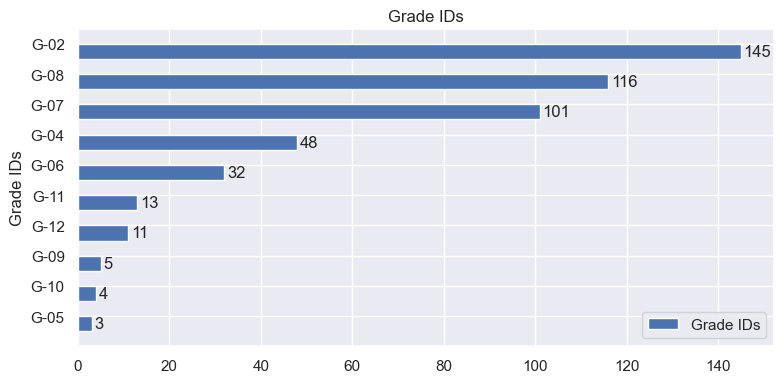

In [22]:
labels = list(grade_id_df['index'])[::-1]
counts_topic= list(grade_id_df['grade_id'])[::-1]

y = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.barh(y - width/2, counts_topic, width, label='Grade IDs')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Grade IDs')
ax.set_title("Grade IDs")
ax.set_yticks(y, labels)
ax.legend(loc=4)

ax.bar_label(rects1, padding=2)

fig.tight_layout()

plt.show()

In [23]:
grade_map = {
    'G-02':'Lower',
    'G-04':'Lower',
    'G-05':'Lower',
    'G-06':'Lower',
    'G-07':'Higher',
    'G-08':'Higher',
    'G-09':'Higher',
    'G-10':'Higher',
    'G-11':'Higher',
    'G-12':'Higher'
}

In [24]:
type(grade_map)

<class 'dict'>

In [25]:
grade_id_df['grade_labels']= grade_id_df['index'].map(grade_map)
grade_id_df

,index,grade_id,%,grade_labels
0,G-02,145,30.334728,Lower
1,G-08,116,24.267782,Higher
2,G-07,101,21.129707,Higher
3,G-04,48,10.041841,Lower
4,G-06,32,6.694561,Lower
5,G-11,13,2.719665,Higher
6,G-12,11,2.301255,Higher
7,G-09,5,1.046025,Higher
8,G-10,4,0.836820,Higher
9,G-05,3,0.627615,Lower


In [26]:
ordinal_df['modified_grade_id']= ordinal_df['grade_id'].map(grade_map)
ordinal_df.head()

,stage_id,grade_id,modified_grade_id
0,LowerLevel,G-04,Lower
1,LowerLevel,G-04,Lower
2,LowerLevel,G-04,Lower
3,LowerLevel,G-04,Lower
4,LowerLevel,G-04,Lower


In [27]:
ordinal_df['modified_grade_id'].value_counts()

Higher    250
Lower     228
Name: modified_grade_id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='modified_grade_id'>

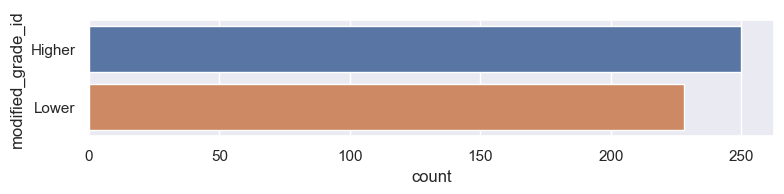

In [28]:
plt.rcParams["figure.figsize"] = [8.00, 2.00]

fig, axs = plt.subplots()

sns.countplot(y='modified_grade_id', data=ordinal_df, order=['Higher','Lower'])


In [ ]:
# TODO Description

#### 3.2 topic

In [ ]:
# TODO Feature Engineering

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
'stage_id' and 'section_id' have low nominal values but 'nationality', 'placeof_birth','grade_id' and 'topic' have high cardinality and rare lables.

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
 <p>'stage_id' and 'section_id'
 <p> Inspecting the histograms and pie charts reveals that the labels in these two categories are not balance.

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'nationality' reveals the presence of rare labels.

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'place_of_birth' reveals the presence of rare labels.
<p> Visually comparing the 'nationality' and 'place_of_birth' features exibit close similarities. 

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'grade_id' reveals the presence of rare labels.

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'topic' exibit variations in labels.

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">

<p> Inspecting the histogram and pie chart of 'class' reveals the presence of three nearly balanced classes.

### 3. Encode Categorical Input Features

### 4. Encode Target Output 

## Observations

Graphically visualizing the categorical feature we observe:    

1. The presence of binary, nominal and cardinal categories.
2. Binary catregories are:   
    a. **'gender'**    
    b. **'semester'**   
    c. **'relation'**    
    d. **'parent_answering_survey'**   
    e. **'parent_school_satisfaction'**   
    f. **'student_absence_days'**   
3. Nomial categories are:    
    a. **'nationality'**    
    b. **'place_of_birth'**    
    c. **'section_id'**   
    d. **'topic'**
4. Ordinal categories are:   
    a. **'stage_id'**   
    b. **'grade_id'**    
5. The target feature is also Ordinal with three labels.
6. All binary categorical features and target are alsmot balaced.
7. Categories of **'nationality'** and **'place_of_birth'** features show the presence of rare labels and close similarity.  
8. Categories of **'satge_id'** and **'grade_id'** features are also intutively similar.
9. Categories of **'section_id'** and **'stage_id'** shows similar distributions but are independent.
10. Categories of **'topic'** have higher cardinality.

## Conclusion

Based on the obervations:

1. Due to the balnced nature all binary categorical featurea require no further processing.
2. The target calss is also balanced and need no processing.
3. Due to the presence of rare lables categories of **'nationality'** and **'place_of_birth'** require feature engineering.
4. Due to the close similarities of **'satge_id'** and **'grade_id'**, these features require close observation in feature selection stage.   
5. Higher cardinality of **'topic'** feature also require feature engineering possibly division in STEM and Humanities categories.

------------------------------------------------------------------------------------------------------------------------------

# sklearn.preprocessing.LabelEncoder

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(["paris", "paris", "tokyo", "amsterdam"])
list(le.classes_)

In [ ]:
le.transform(["tokyo", "tokyo", "paris"])
list(le.inverse_transform([0, 2, 1]))

# sklearn.preprocessing.OrdinalEncoderm

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

enc.categories_

enc.transform([['Female', 3], ['Male', 1]])


In [ ]:
enc.inverse_transform([[1, 0], [0, 1]])

# sklearn.preprocessing.Normalizer

In [ ]:
>>> from sklearn.preprocessing import Normalizer
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]

transformer = Normalizer().fit(X)  # fit does nothing.

transformer

transformer.transform(X)


# sklearn.preprocessing.OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

enc.categories_

enc.transform([['Female', 1], ['Male', 4]]).toarray()

enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])

enc.get_feature_names_out(['gender', 'group'])


In [ ]:
drop_enc = OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

drop_enc.transform([['Female', 1], ['Male', 2]]).toarray()


In [ ]:
drop_binary_enc = OneHotEncoder(drop='if_binary').fit(X)
drop_binary_enc.transform([['Female', 1], ['Male', 2]]).toarray()


In [ ]:
import datetime

base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0,30)]
df = pd.DataFrame(date_list)
df.columns =['day']
df.head()

In [ ]:
df['day_of_week'] = df['day'].dt.day_name()
df.head()

In [ ]:
weekday_map = {
    'Monday' : 1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}
df['day_ordinal']= df['day_of_week'].map(weekday_map)
df.head()

In [ ]:
df['day_ordinal']= df['day_of_week'].map(weekday_map)
df.head()